In [1]:
import busqueda_acc_pca_tamaño as bapca
import busqueda_hiperparams as bh
import region_decision as rd
import PCA as pca
import classifierLR as lr
import classifierNB as nb
import classifierSVM as svm
import classifierTree as tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('diabetes.csv')
df
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

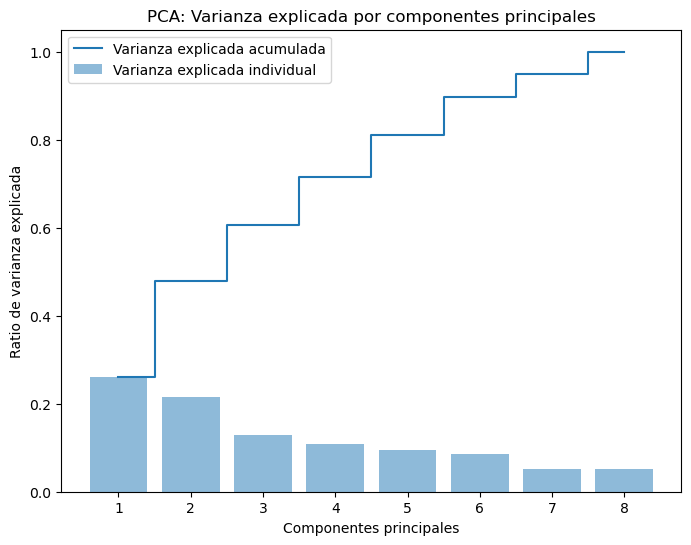

0

In [3]:
pca.grafica_PCA(X)

SVM
-------------------- 



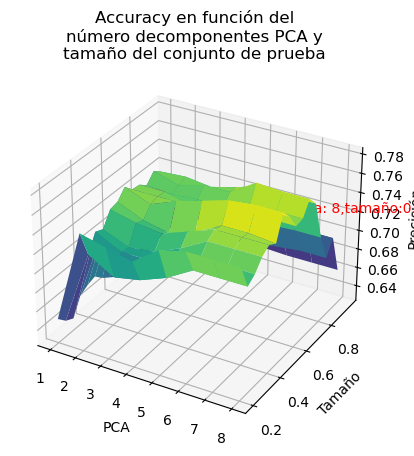

Componentes principales óptimos:  8
Tamaño óptimo:  0.5
No se ha llegado al accuracy 0.9, el mejor valor es encontrado por medio de Random Search es:
acc_in: 0.75 
acc_out: 0.763
-------------------- 



Regresión Logísitica
-------------------- 



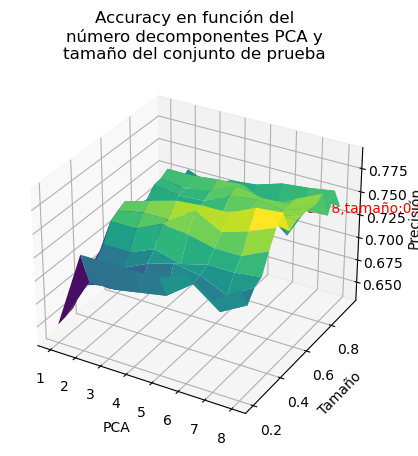

Componentes principales óptimos:  8
Tamaño óptimo:  0.5
No se ha llegado al accuracy 0.9, el mejor valor es encontrado por medio de Random Search es:
accuracy in: 0.7630208333333334

accuracy out: 0.7994791666666666

parámetros finales: <bound method BaseEstimator.get_params of LogisticRegression()>
acc_in: 0.763 
acc_out: 0.799
-------------------- 



Naive Bayes
-------------------- 



c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


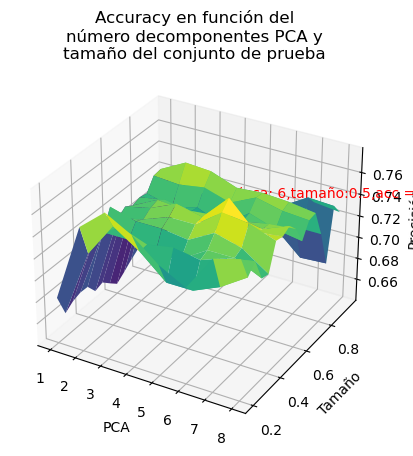

Componentes principales óptimos:  6
Tamaño óptimo:  0.5
No se ha llegado al accuracy 0.9, el mejor valor encontrado por medio de Random Search es:
accuracy in: 0.7395833333333334

accuracy out: 0.7630208333333334

parámetros finales: {'priors': None, 'var_smoothing': 1e-09}
acc_in: 0.74 
acc_out: 0.763
-------------------- 



Árbol de Decisión
-------------------- 



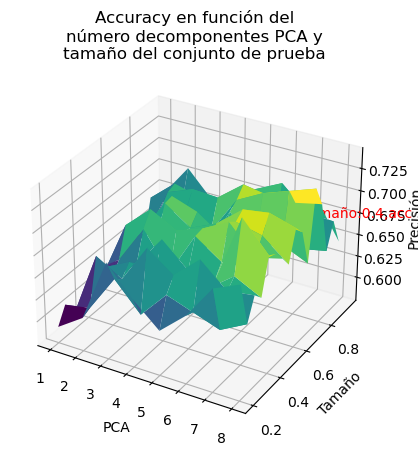

Componentes principales óptimos:  7
Tamaño óptimo:  0.4
acc_in: 1.0 
acc_out: 0.698051948051948
-------------------- 





In [4]:
clf_svm = SVC()
clf_lr = LogisticRegression()
clf_nb = GaussianNB()
clf_tree = DecisionTreeClassifier()
# clf_svm1 = svm.classifierSVM()
# clf_lr1 = lr.classifierLR()
# clf_nb1 = nb.classifierNB()
# clf_tree1 = tree.classifiertree()
# (x, y, samp_size=0.2, params=None, accuracy_solicitado=0.9)
clasificadores = {clf_svm:'SVM' ,
                  clf_lr:'Regresión Logísitica'
                  , clf_nb:'Naive Bayes',
                    clf_tree: 'Árbol de Decisión'}
pca_list = [i for i in range(1,9)]
size_list = [i/20 for i in range(4,20)]
for clf , name in clasificadores.items():
    print(name)
    print('-'*20, '\n')
    pca , size, acc = bapca.busqueda_tamano_pca(clf, X, y, pca=pca_list, size=size_list, tamano_random=1)
    print('Componentes principales óptimos: ' , pca)
    print('Tamaño óptimo: ' , size)
    if name == 'SVM':
        accuracy_in, accuracy_out, parametros_final, clf = svm.classifierSVM(X,y,size, params= None, accuracy_solicitado=0.9)
        print('acc_in:', accuracy_in,'\nacc_out:', accuracy_out)
    elif name == 'Regresión Logísitica':
        accuracy_in, accuracy_out, parametros_final, clf = lr.classifierLogisticRegression(X,y,size, params= None, accuracy_solicitado=0.9)
        print('acc_in:', accuracy_in,'\nacc_out:', accuracy_out)
    elif name == 'Naive Bayes':
        accuracy_in, accuracy_out, parametros_final, clf = nb.classifierNaiveBayes(X,y,size, params= None, accuracy_solicitado=0.9)
        print('acc_in:', accuracy_in,'\nacc_out:', accuracy_out)
    else:
        accuracy_in, accuracy_out, parametros_final, clf = tree.classifierTree(X,y,size, params= None)
        print('acc_in:', accuracy_in,'\nacc_out:', accuracy_out)
    # print('Accuracy alcanzado: ', acc)
    print('-'*20, '\n\n\n')

## Analizamos las regiones de decisión

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


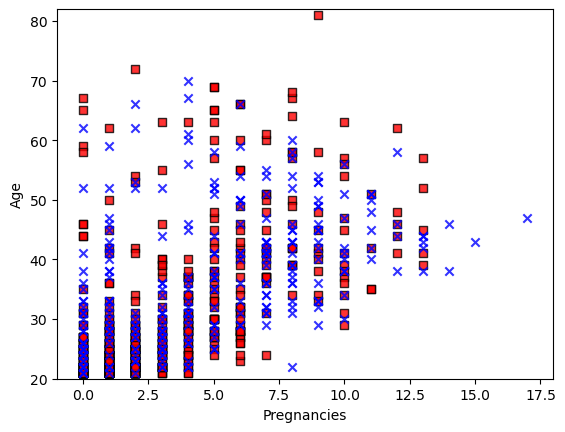

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


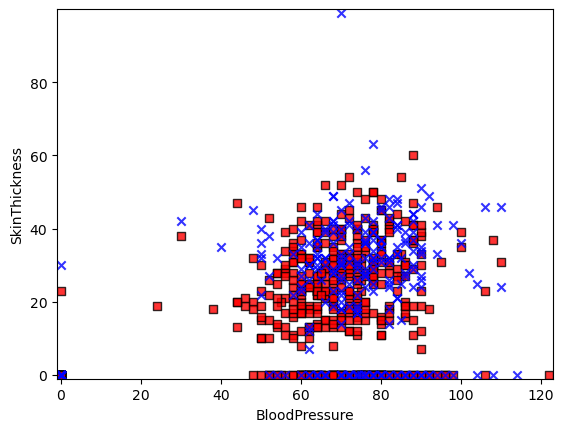

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


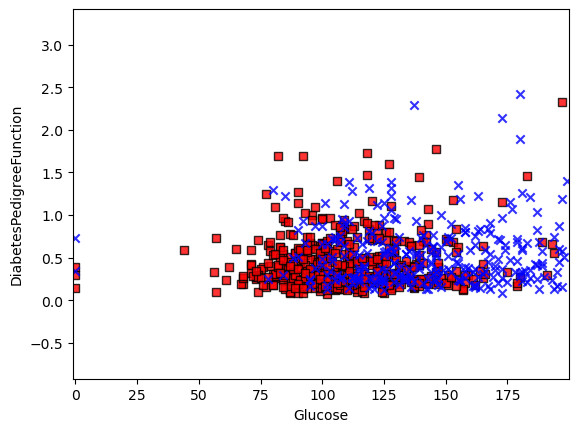

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


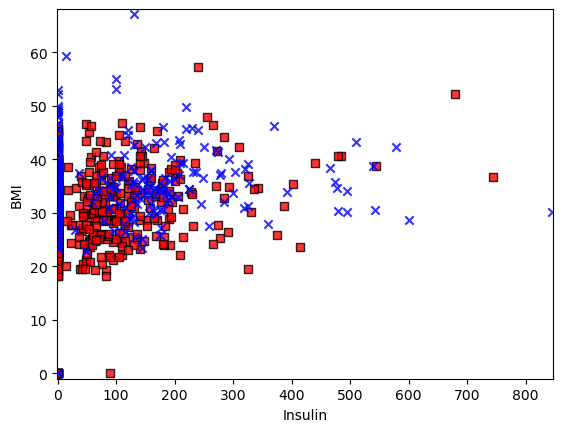

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


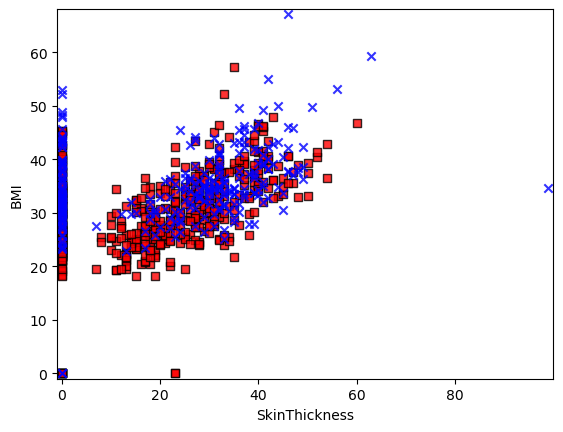

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


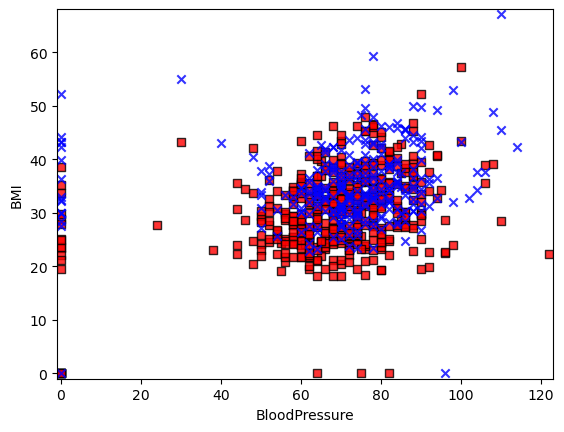

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


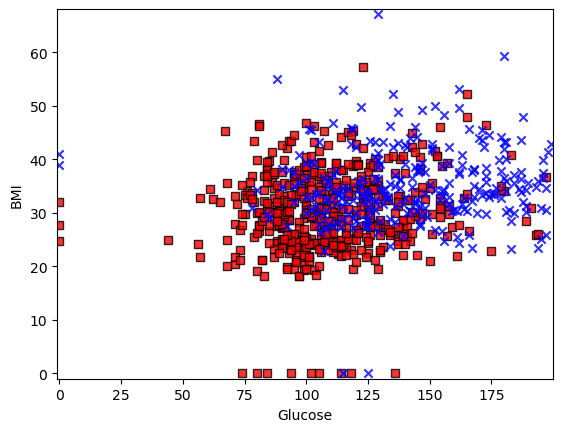

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


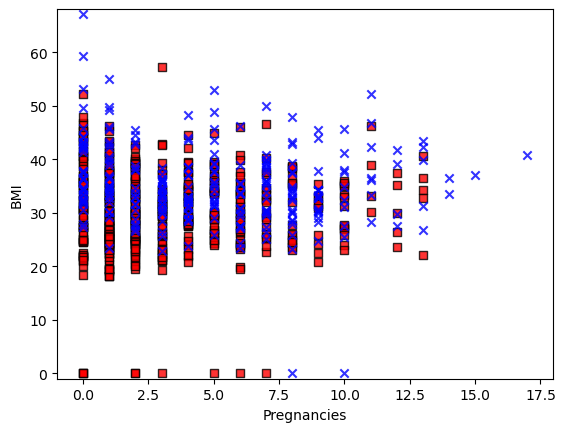

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


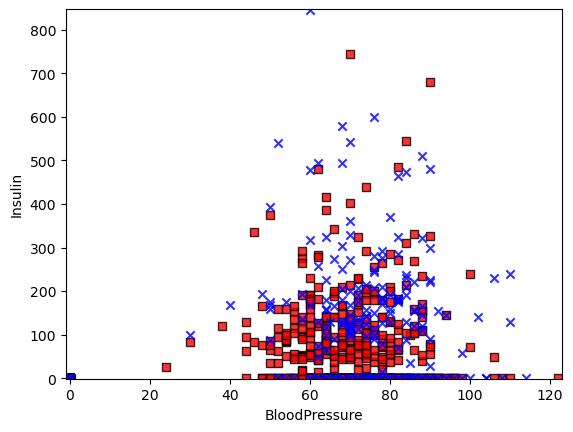

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


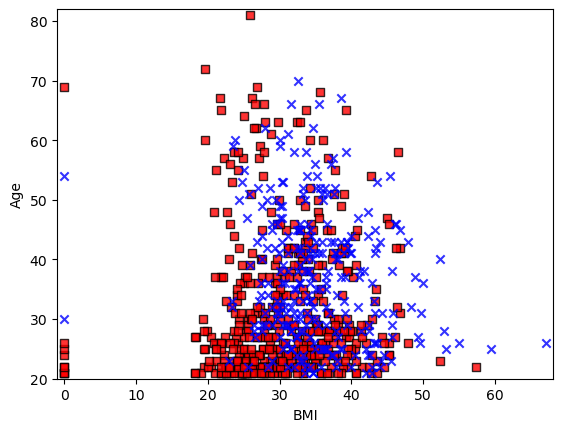

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


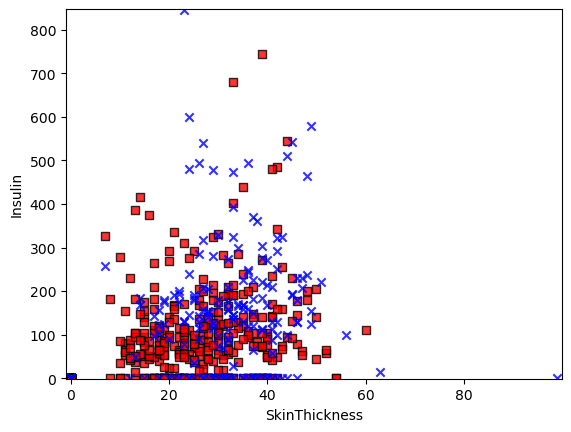

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


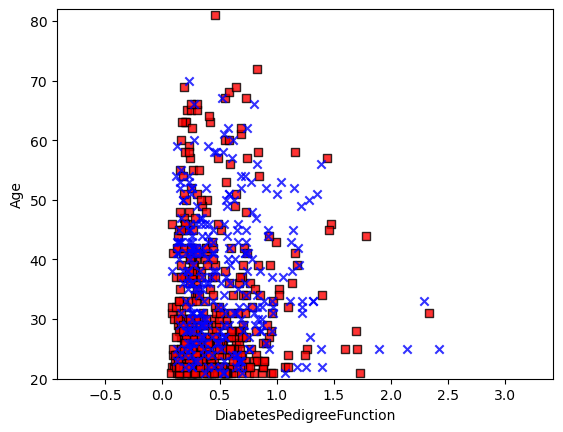

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


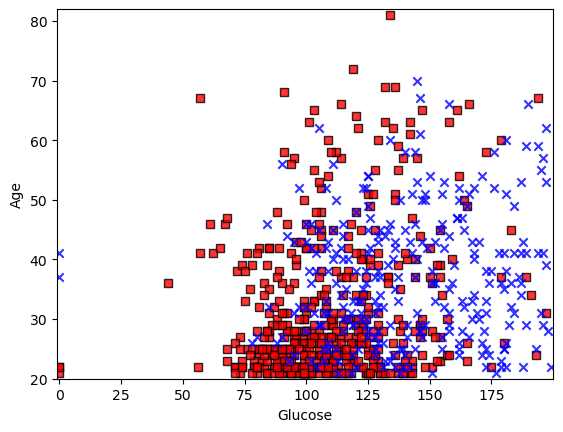

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


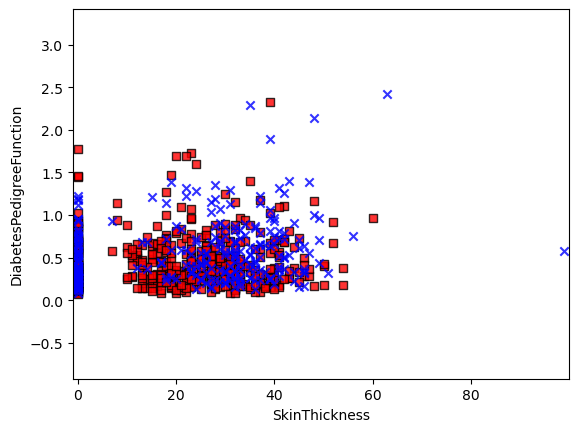

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


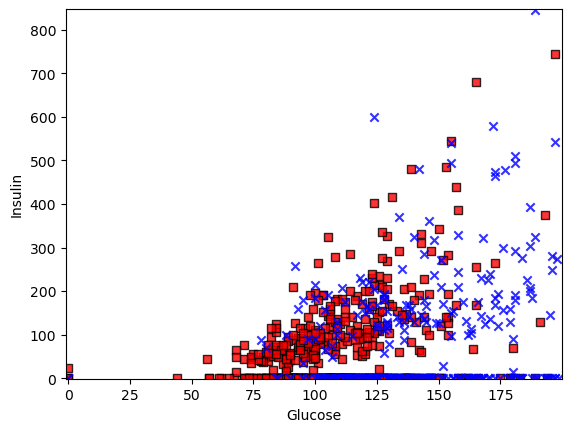

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


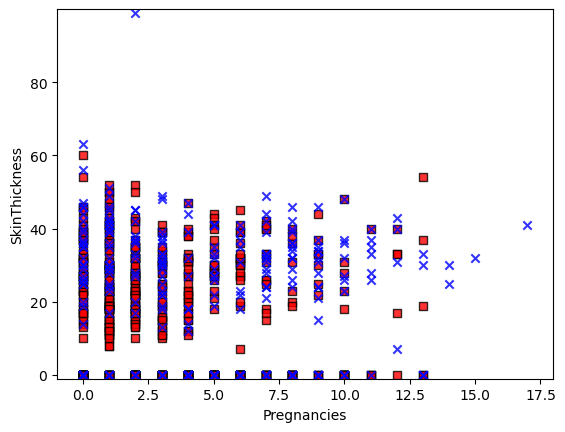

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


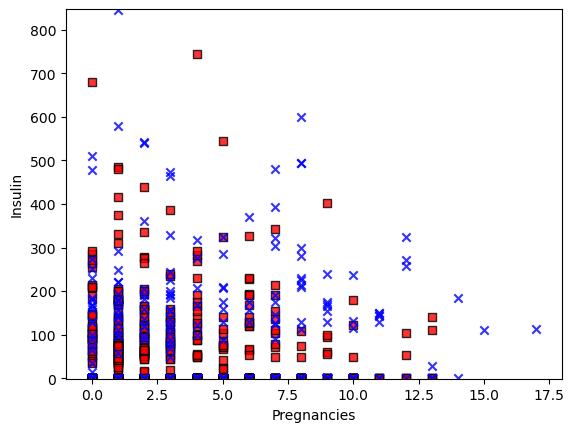

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


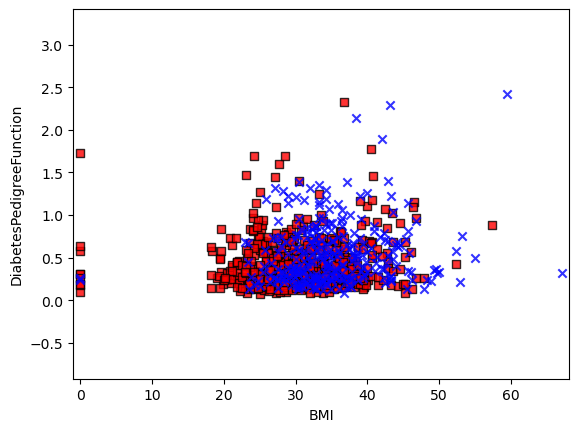

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


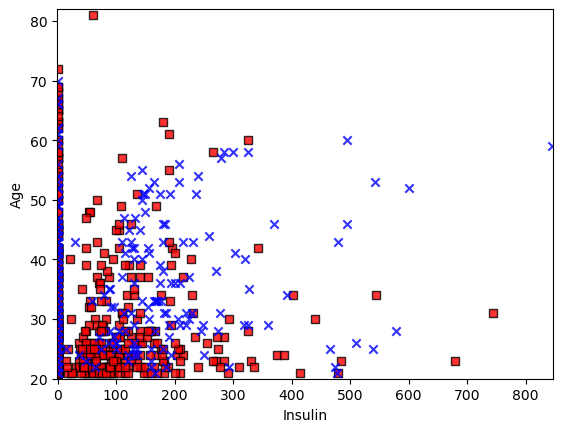

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


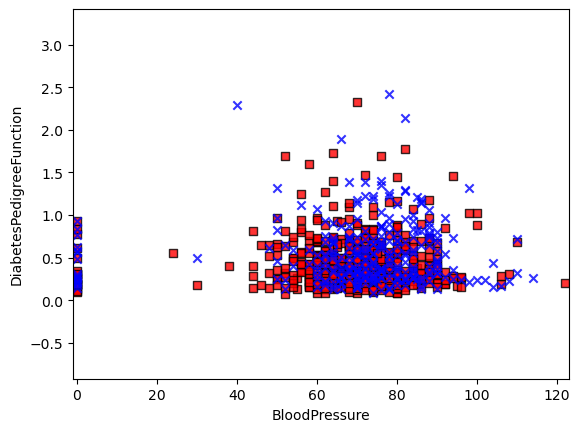

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


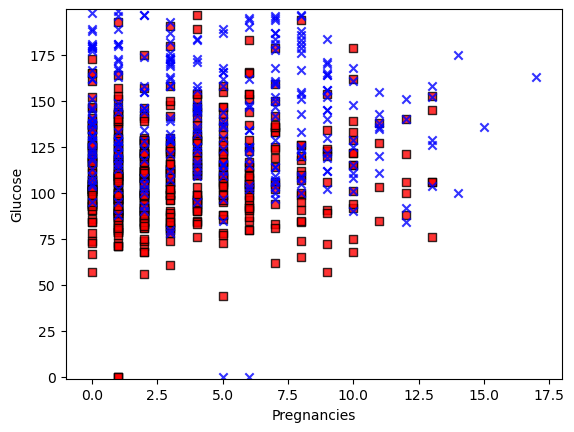

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


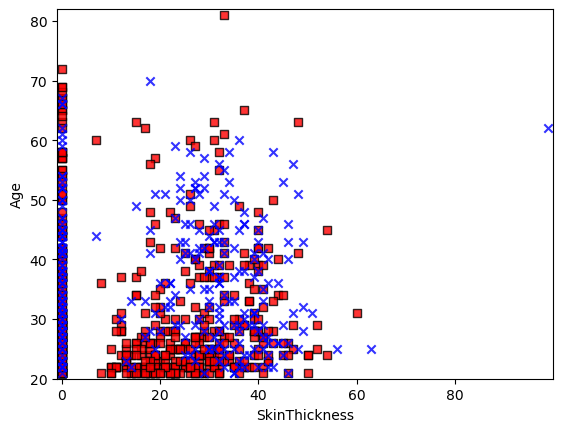

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


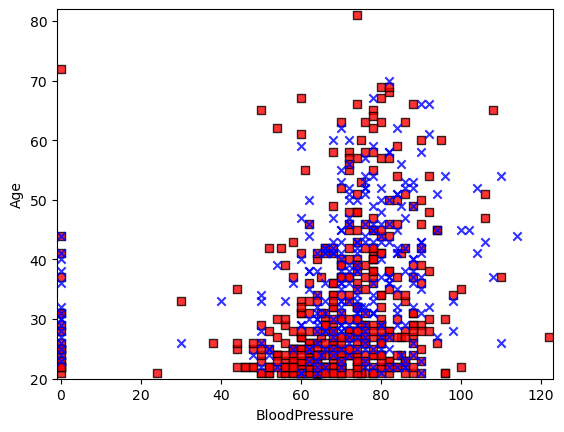

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


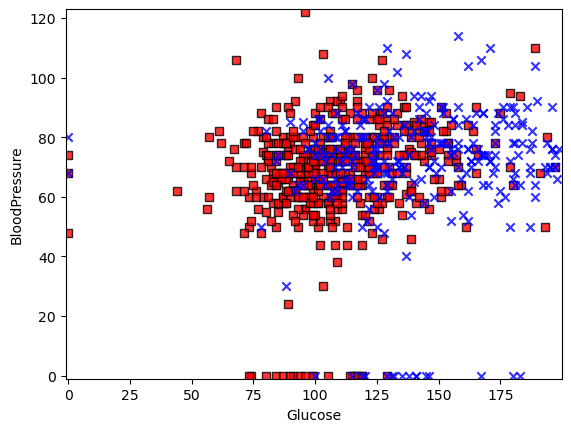

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


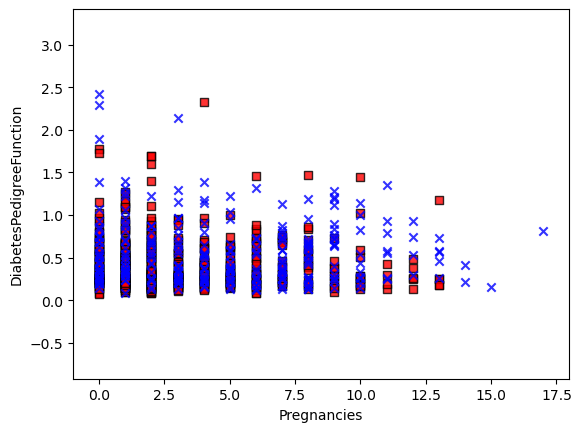

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


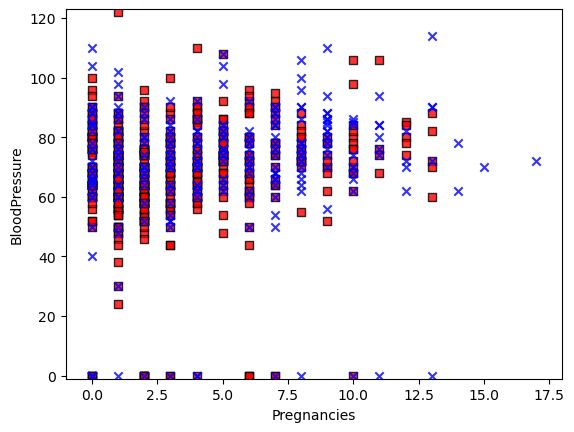

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


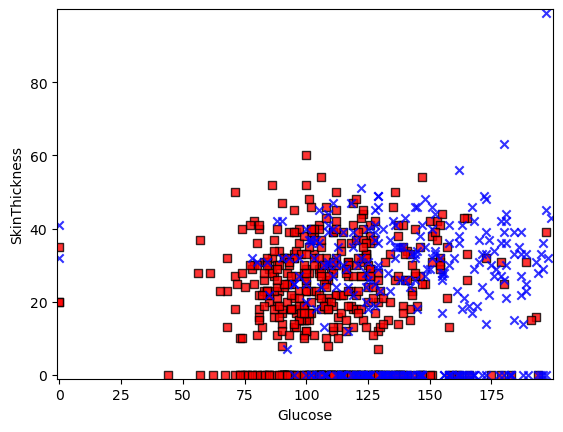

C:\Users\pedro\AppData\Local\Temp\ipykernel_12780\4043797342.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


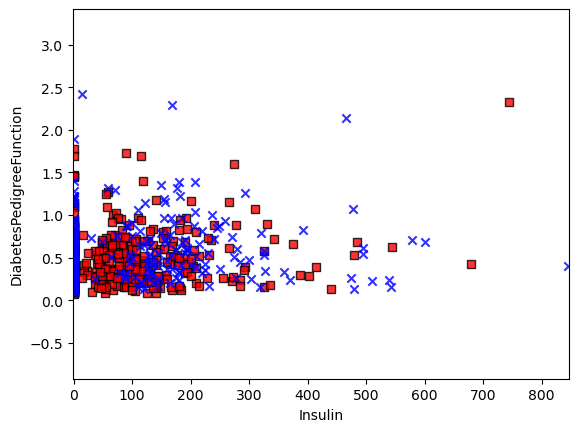

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# x1 = np.array(df[df.columns[1:3]])
def plot_labels_regions(X, y,  resolution=0.02):
    labelx = X.columns[0]
    labely = X.columns[1] 
    X = np.array(X)
    # Configurar el mapa de colores
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Graficar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Z = Z.reshape(xx1.shape)
    # plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()
    return 0
def muestra_aleatoria_pares(lista_valores, cant = 0.8):
    import random
    
    rango = range(len(lista_valores))
    lista = []
    for i in rango:
        for j in rango:
            if i == j or [lista_valores[j],lista_valores[i]] in lista:
                continue
            else:
                lista.append([lista_valores[i],lista_valores[j]])
    n = int(cant * len(lista))
    muestra = random.sample(lista , n)
    return muestra
muestra = muestra_aleatoria_pares(df.columns[0:-1],1)
for i in range(0,len(muestra)):
    par = muestra[i]
    li,ls = par[0],par[1]
    x = df[[li,ls]]
    plot_labels_regions(x , y)

In [6]:
#Vemos un ejemplo de la región de decisión del calsificador SVM mostrano el resultado de no poder tener una región de decisión
rd.plot_decision_regions( np.array(df[['Insulin', 'Glucose']]) , y , clf_svm)

ValueError: X has 2 features, but SVC is expecting 5 features as input.

# Los gráficos sugieren que debemos determinar una manera de separar los datos $\longrightarrow$ Métodos Kernel 
## Aplicar un métodos kernel y luego regresion ridge?
## Sugiere un método de ensamblaje?

pasos:
1-. Los datos no son separables
2-. Se utilizará un método kernel para ver qué tal se comporta SVM 
2-. Hacer búsqueda de hiperparámetros con los otros clasificadores